In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

np.set_printoptions(suppress=True, precision=4)
warnings.filterwarnings("ignore")

# This notebook was run using Python 3.10.7
# Running the code from top to bottom will work just fine

In [2]:
df = pd.read_csv("mtcars.csv")

In [76]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


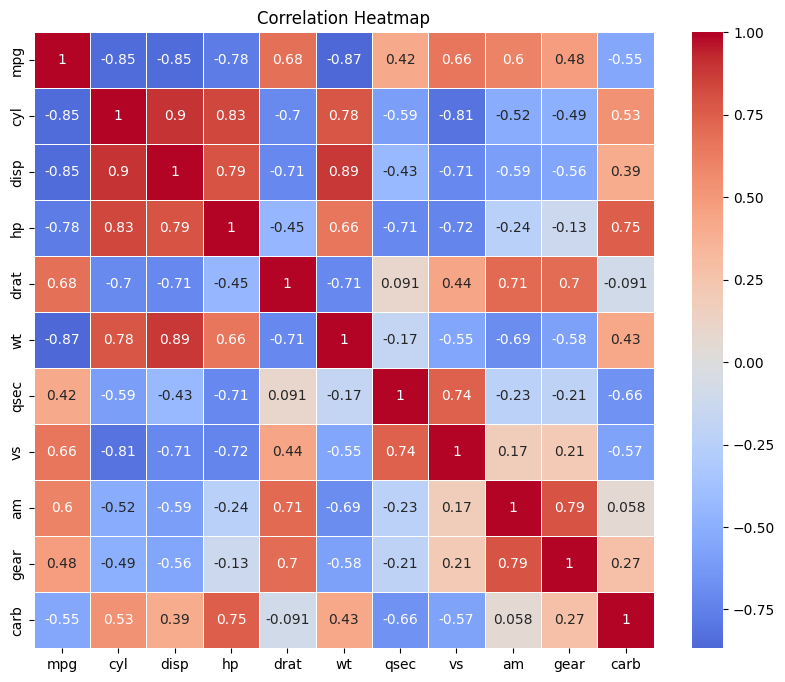

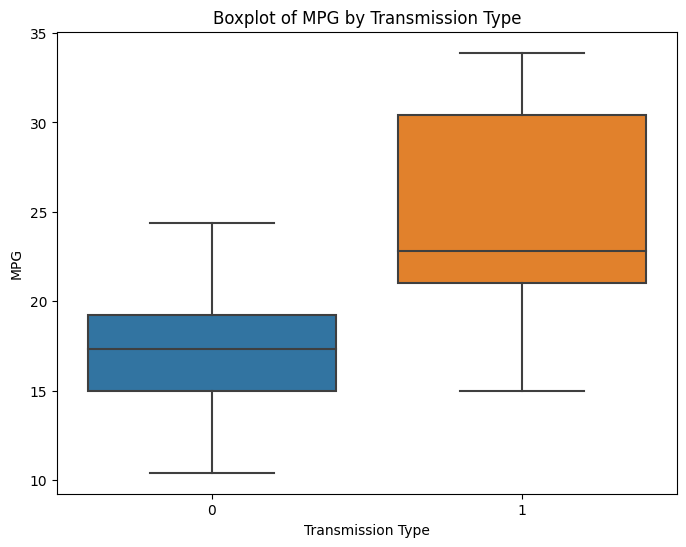

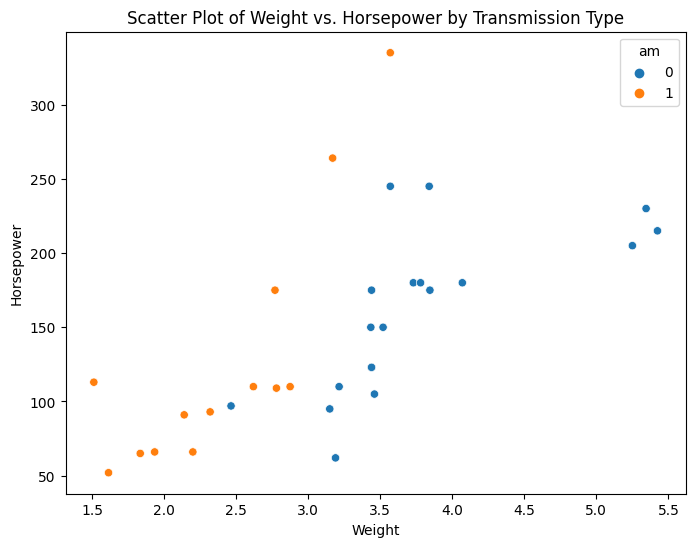

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths = 0.5, center=0)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='am', y='mpg', data=df)
plt.title("Boxplot of MPG by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("MPG")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='wt', y='hp', data=df, hue='am')
plt.title("Scatter Plot of Weight vs. Horsepower by Transmission Type")
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.show()

In [7]:
def train_models(X_train, y_train):
    logreg_model = LogisticRegression(random_state=27)
    logreg_model.fit(X_train, y_train)

    tree_model = DecisionTreeClassifier(random_state=27)
    tree_model.fit(X_train, y_train)

    forest_model = RandomForestClassifier(random_state=27)
    forest_model.fit(X_train, y_train)
    
    return logreg_model, tree_model, forest_model

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

def visualize_metrics_comparison(scores_df):
    plt.figure(figsize=(12, 6))
    scores_df.plot(kind='bar', colormap='coolwarm')
    plt.title("Comparison of Metrics for Different Models")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_feature_importances(model, feature_names, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=model.feature_importances_, y=feature_names)
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

def plot_predicted_probabilities(y_test, probabilities):
    results_df = pd.DataFrame(probabilities, columns=['auto_prob', 'manual_prob'])
    results_df['actual_am'] = y_test.values
    markers_df = pd.DataFrame({'markers': results_df['auto_prob'], 'actual_am': y_test.values})

    plt.figure(figsize=(10, 6))
    plt.plot(markers_df.index, markers_df['markers'], marker='o', linestyle='-', linewidth=2)
    plt.xticks(markers_df.index, markers_df['actual_am'])
    plt.title("Line Plot with Markers for Predicted Probabilities by Actual Transmission Type")
    plt.xlabel("Actual Transmission Type")
    plt.ylabel("Predicted Probability")
    plt.ylim(0, 1.02)  # Set y-axis limit to match the visualization nicely
    plt.show()


LogisticRegression(random_state=27)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



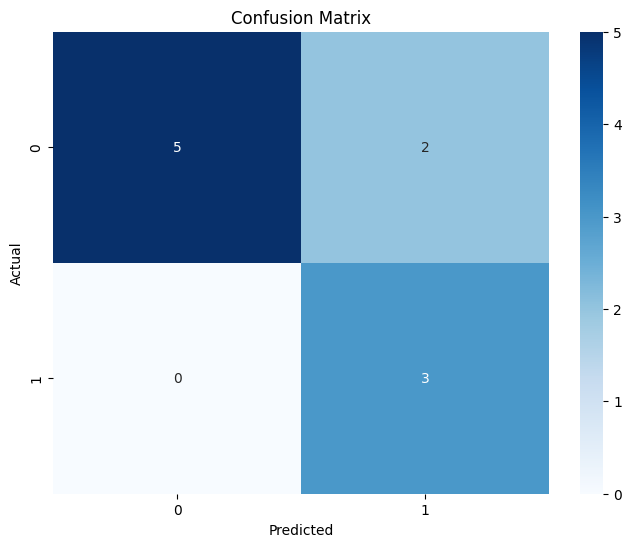

DecisionTreeClassifier(random_state=27)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



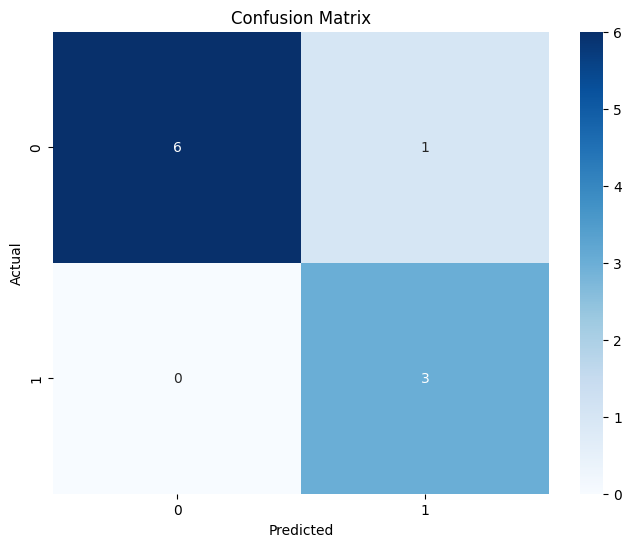

RandomForestClassifier(random_state=27)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



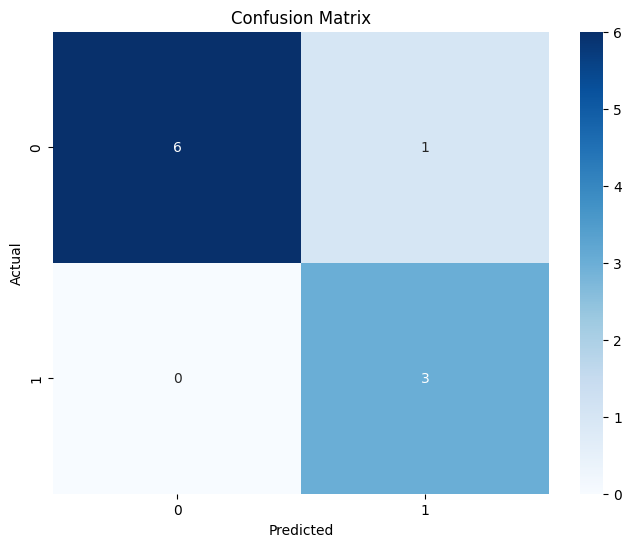

<Figure size 1200x600 with 0 Axes>

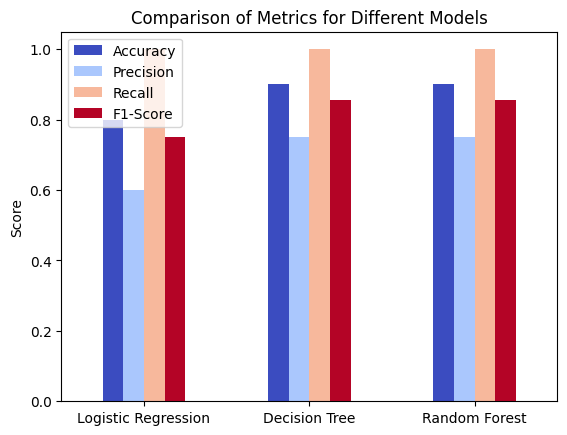

In [8]:
X = df.drop(['am', 'Unnamed: 0'], axis=1)
y = df['am']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
logreg_model, tree_model, forest_model = train_models(X_train, y_train)
models = [logreg_model, tree_model, forest_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
    print(model)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    plot_confusion_matrix(y_test, y_pred)
    scores.append([accuracy, precision, recall, f1])

scores_df = pd.DataFrame(scores, columns=metrics, index=model_names)
visualize_metrics_comparison(scores_df)

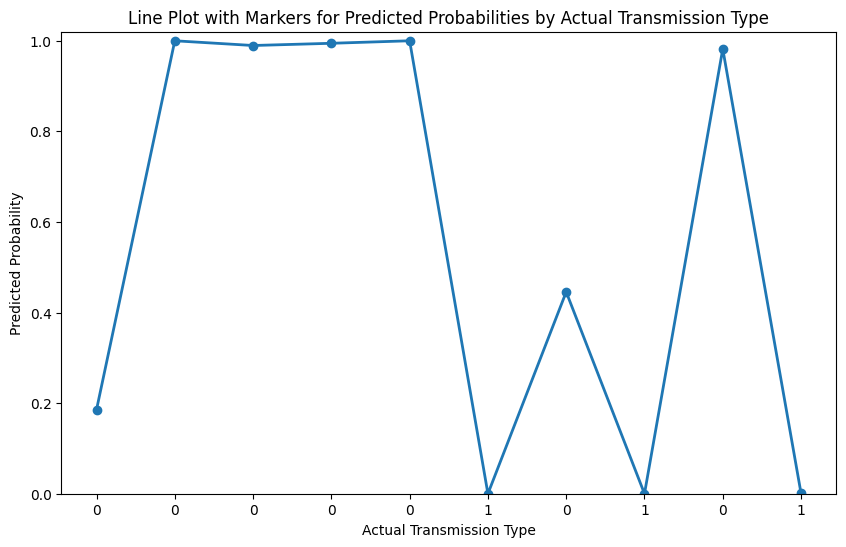

In [9]:
plot_predicted_probabilities(y_test, logreg_model.predict_proba(X_test))

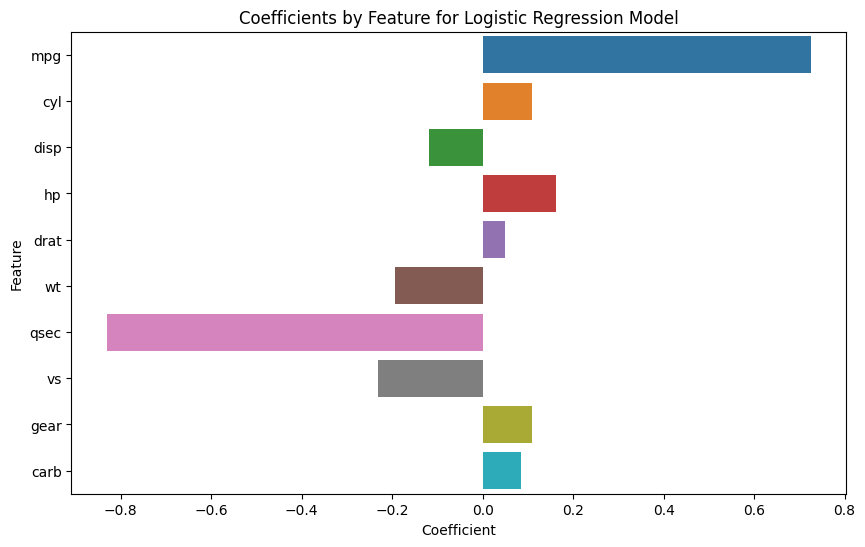

In [10]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg_model.coef_[0]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, orient='h')
plt.title("Coefficients by Feature for Logistic Regression Model")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

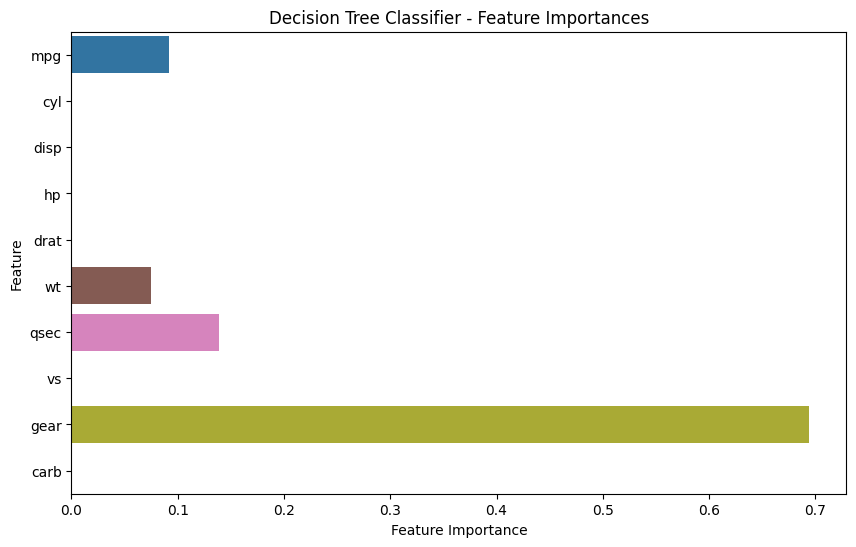

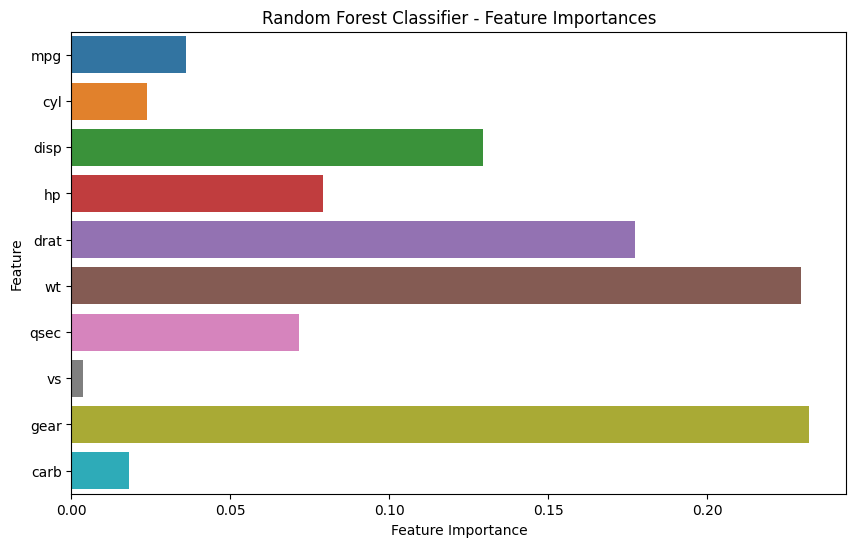

In [12]:
feature_names = X.columns
plot_feature_importances(tree_model, feature_names, "Decision Tree Classifier - Feature Importances")
plot_feature_importances(forest_model, feature_names, "Random Forest Classifier - Feature Importances")

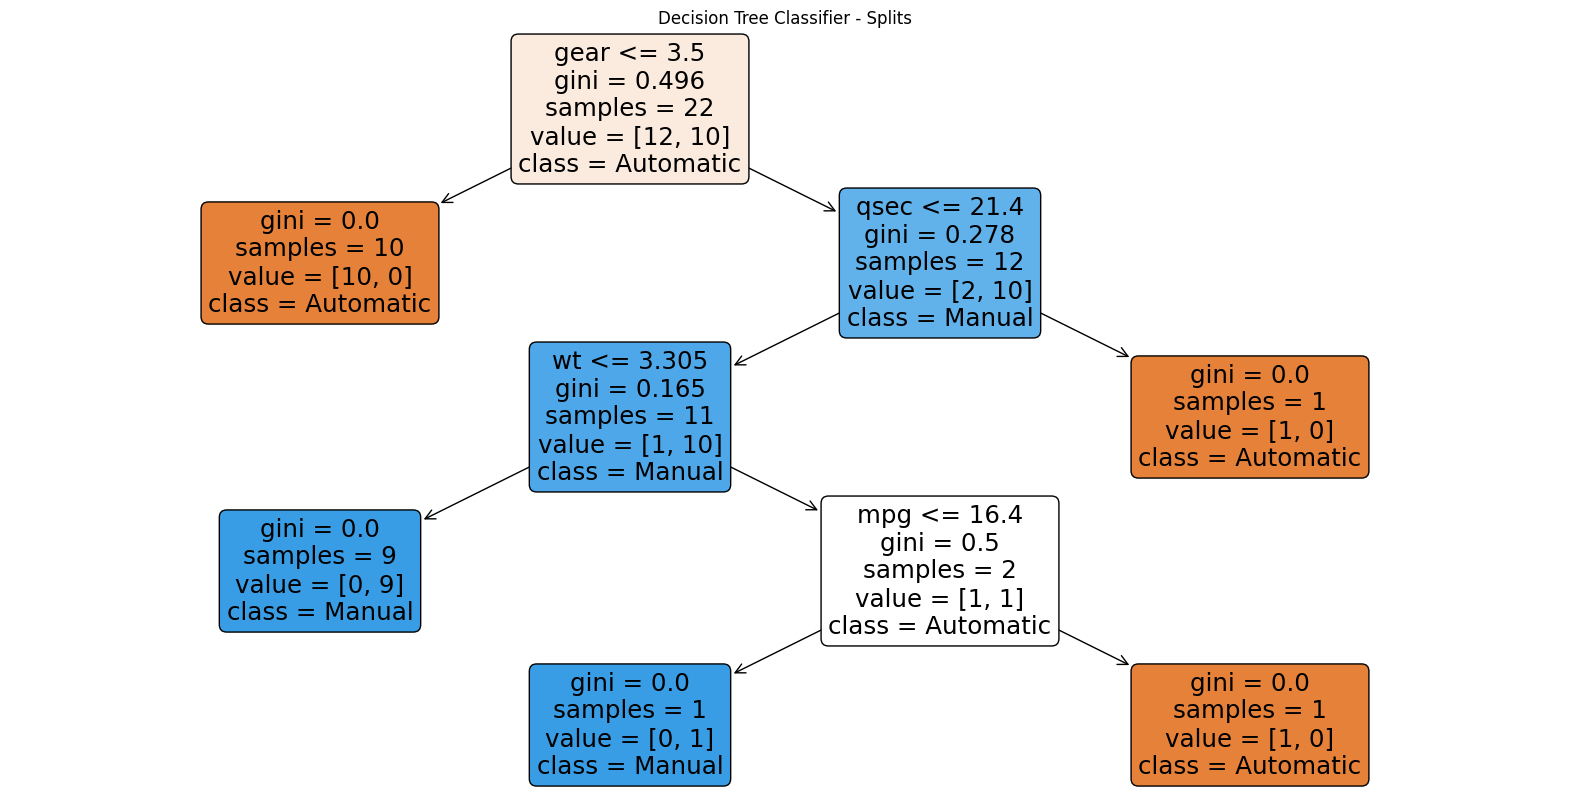

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, class_names=['Automatic', 'Manual'])
plt.title("Decision Tree Classifier - Splits")
plt.show()

Let's try to cut down on some features and see if the performance improves for the logistic regression model

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



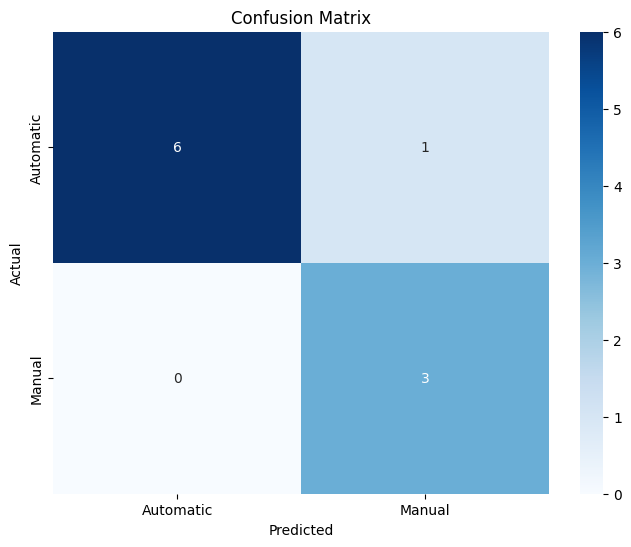

In [14]:
X = df.drop(['am','Unnamed: 0','cyl','disp','hp','drat','wt','gear','carb'], axis=1)
y = df['am']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

logreg_model = LogisticRegression(random_state=27)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['Automatic', 'Manual'])
plt.yticks([0.5, 1.5], ['Automatic', 'Manual'])
plt.show()

Improved!

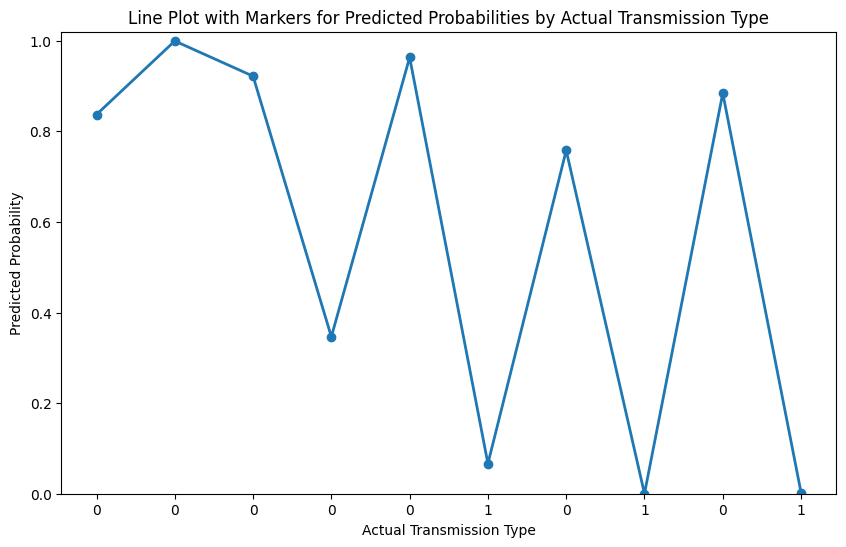

In [15]:
plot_predicted_probabilities(y_test, logreg_model.predict_proba(X_test))